<a href="https://colab.research.google.com/github/supragyabajpai/SchulichJourney_DataScience/blob/main/Grp9_DS/Spotify_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/Schulich MBAN/Sem- 1/Data Science/FInal proect/spotify_data.csv'

In [4]:
df = pd.read_csv(dataset_path)

In [5]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159764 non-null  object 
 2   track_name        1159764 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [7]:
df.describe(include='all')

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1159764,1159764,1159764,1.159764e+06,1.159764e+06,1159764,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
unique,NaN,64159,882361,1159764,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Traditional,Intro,53QF56cjZA9RTuuMZDrSA6,NaN,NaN,black-metal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4058,466,1,NaN,NaN,21852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.590613e+05,NaN,NaN,NaN,1.838312e+01,2.011955e+03,NaN,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,NaN,NaN,NaN,1.588554e+01,6.803901e+00,NaN,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00,2.000000e+03,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,NaN,NaN,NaN,5.000000e+00,2.006000e+03,NaN,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,NaN,NaN,NaN,1.500000e+01,2.012000e+03,NaN,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,NaN,NaN,NaN,2.900000e+01,2.018000e+03,NaN,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00


In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

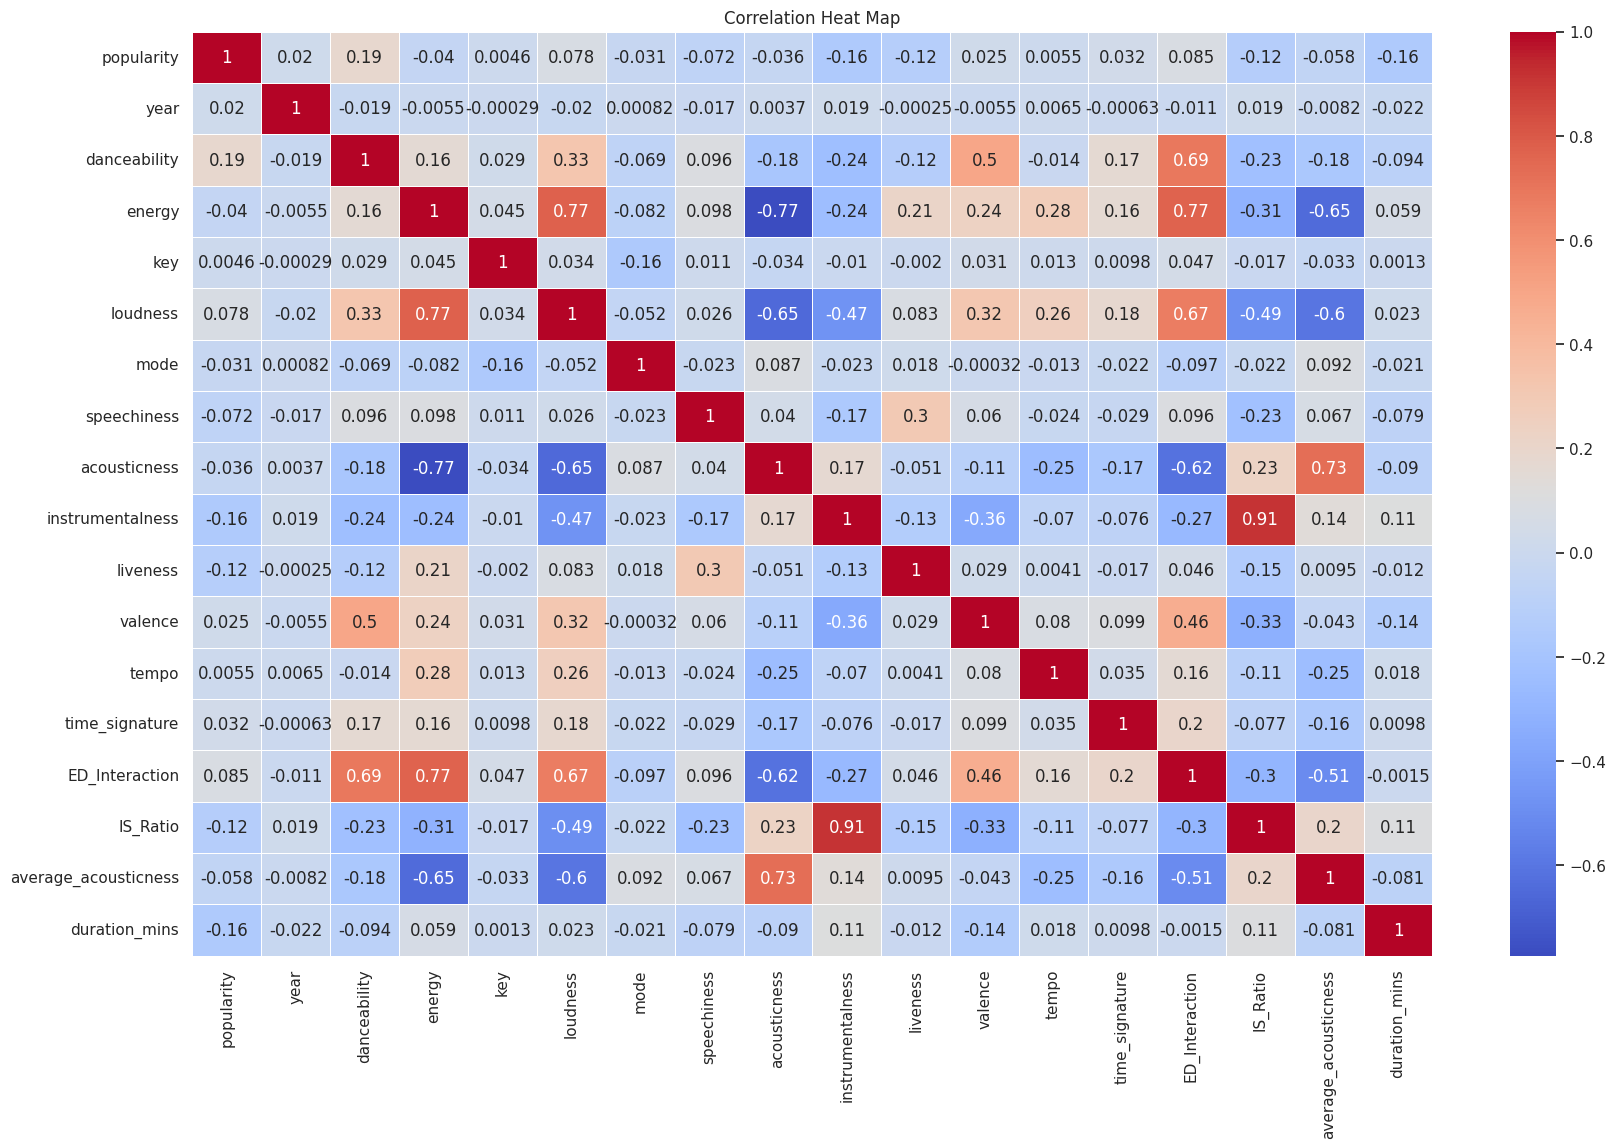

Sorted Correlation for 'popularity' column:
popularity              1.000000
danceability            0.187209
ED_Interaction          0.085410
loudness                0.077818
time_signature          0.031902
valence                 0.025170
year                    0.020342
tempo                   0.005511
key                     0.004606
mode                   -0.031420
acousticness           -0.036386
energy                 -0.039885
average_acousticness   -0.058452
speechiness            -0.071783
liveness               -0.115251
IS_Ratio               -0.123425
duration_mins          -0.155682
instrumentalness       -0.156456
Name: popularity, dtype: float64


In [106]:
corr_matrix = df.corr()

sorted_corr_popularity = corr_matrix['popularity'].sort_values(ascending=False)

# Plotting the heat map
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heat Map")
plt.show()

print("Sorted Correlation for 'popularity' column:")
print(sorted_corr_popularity)

Feature Extraction

In [9]:
df['ED_Interaction'] = df['energy'] * df['danceability']

In [10]:
df['tempo'].describe()

count    1.159764e+06
mean     1.213771e+02
std      2.977975e+01
min      0.000000e+00
25%      9.879700e+01
50%      1.219310e+02
75%      1.399030e+02
max      2.499930e+02
Name: tempo, dtype: float64

In [11]:
bpm_ranges = {
    'slow': (0, 99.910000),
    'medium': (99.910000, 122.107000),
    'fast': (122.107000, 139.990000),
    'rapid': (139.990000, 249.993000)
}

In [12]:
def categorize_bpm(tempo):
    for bpm_range, (min_bpm, max_bpm) in bpm_ranges.items():
        if min_bpm <= tempo < max_bpm:
            return bpm_range
    return 'unknown'

In [13]:
df['bpm_group'] = df['tempo'].apply(categorize_bpm)

In [14]:
df['IS_Ratio'] = df['instrumentalness']/ df['speechiness']

In [15]:
average_acousticness_by_genre = df.groupby('genre')['acousticness'].mean().reset_index()
average_acousticness_by_genre.rename(columns={'acousticness': 'average_acousticness'}, inplace=True)
df = df.merge(average_acousticness_by_genre, on='genre')

In [16]:
df_clustering = df.copy()

Popularity Prediction

In [17]:
df['duration_mins'] = df['duration_ms'] / 60000

In [18]:
df = df.drop(['track_id', 'duration_ms'], axis = 1)

In [19]:
df.drop(df[df['year'] <= 2018].index, inplace = True)

In [20]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'ED_Interaction', 'bpm_group', 'IS_Ratio',
       'average_acousticness', 'duration_mins'],
      dtype='object')

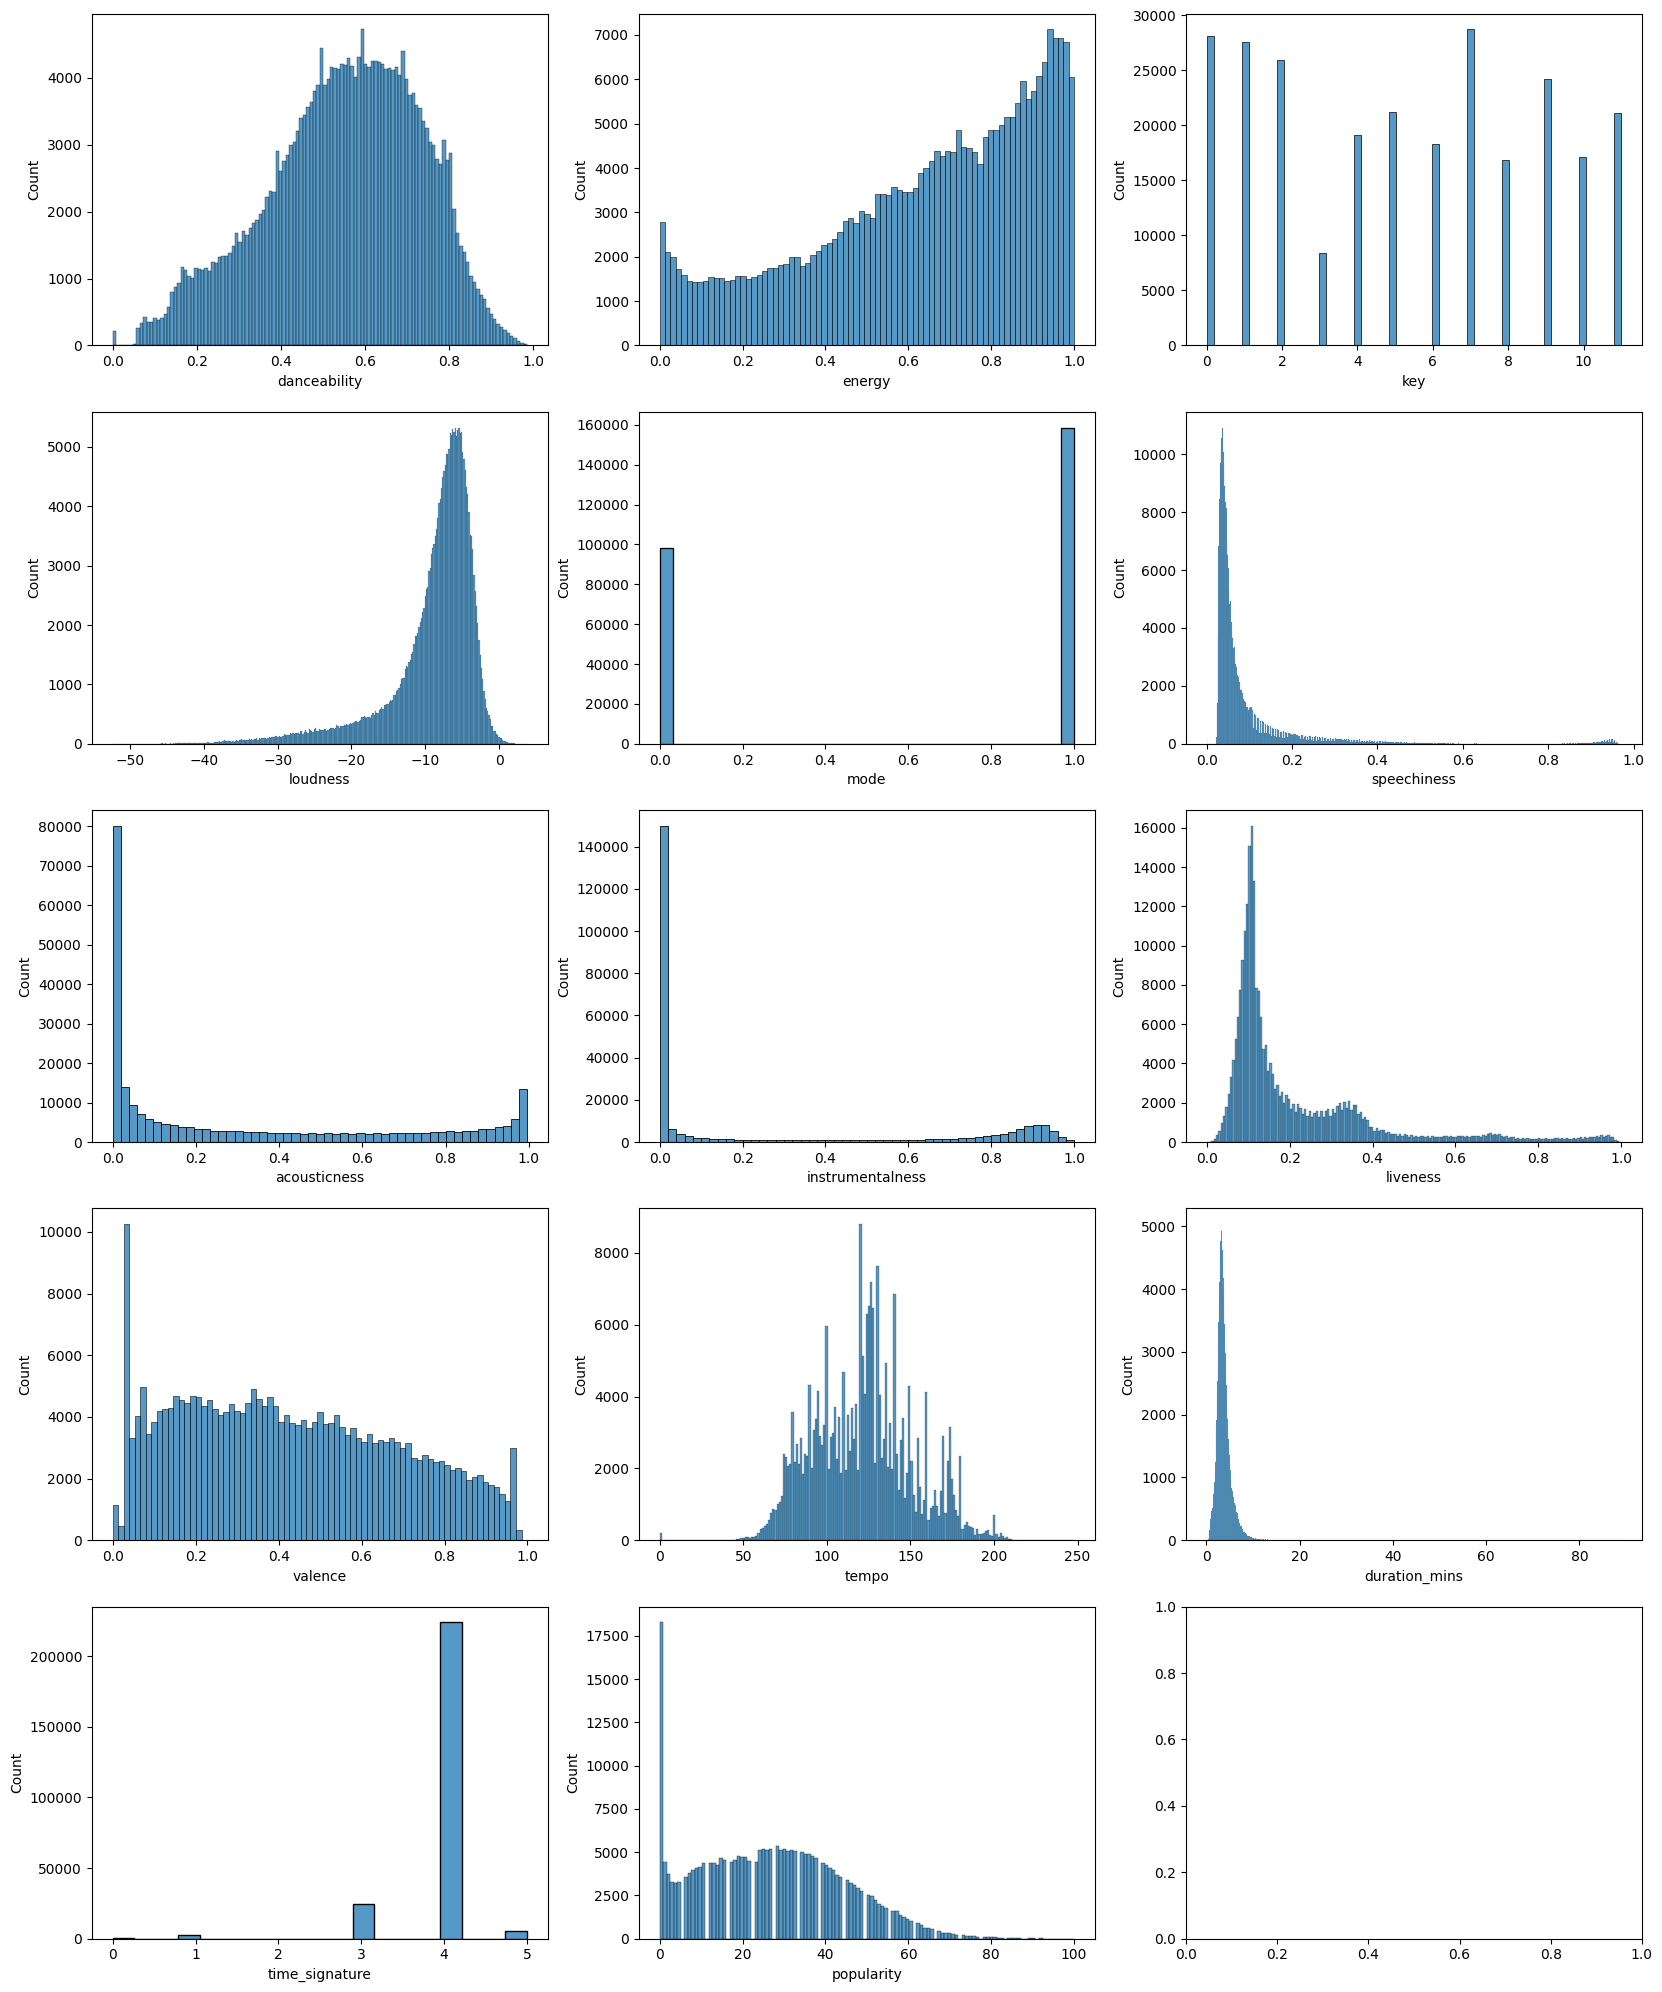

In [21]:
# Create the 5x3 grid of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14 , _)) = plt.subplots(5, 3, figsize=(20, 25))

# Plot the histograms
sns.histplot(df['danceability'], ax=ax1)
sns.histplot(df['energy'], ax=ax2)
sns.histplot(df['key'], ax=ax3)
sns.histplot(df['loudness'], ax=ax4)
sns.histplot(df['mode'], ax=ax5)
sns.histplot(df['speechiness'], ax=ax6)
sns.histplot(df['acousticness'], ax=ax7)
sns.histplot(df['instrumentalness'], ax=ax8)
sns.histplot(df['liveness'], ax=ax9)
sns.histplot(df['valence'], ax=ax10)
sns.histplot(df['tempo'], ax=ax11)
sns.histplot(df['duration_mins'], ax=ax12)
sns.histplot(df['time_signature'], ax=ax13)
sns.histplot(df['popularity'], ax =ax14)

plt.show()

Outlier handeling

In [22]:
df[['popularity']].value_counts()

popularity
0             18273
28             5340
25             5206
27             5203
30             5201
              ...  
93                3
94                1
95                1
96                1
100               1
Length: 98, dtype: int64

In [23]:
df.drop(df[df['popularity'] == 0].index, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238493 entries, 6629 to 1155057
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   artist_name           238493 non-null  object 
 1   track_name            238493 non-null  object 
 2   popularity            238493 non-null  int64  
 3   year                  238493 non-null  int64  
 4   genre                 238493 non-null  object 
 5   danceability          238493 non-null  float64
 6   energy                238493 non-null  float64
 7   key                   238493 non-null  int64  
 8   loudness              238493 non-null  float64
 9   mode                  238493 non-null  int64  
 10  speechiness           238493 non-null  float64
 11  acousticness          238493 non-null  float64
 12  instrumentalness      238493 non-null  float64
 13  liveness              238493 non-null  float64
 14  valence               238493 non-null  float64
 

In [25]:
df[df['danceability'] == 0]

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,time_signature,ED_Interaction,bpm_group,IS_Ratio,average_acousticness,duration_mins
61694,Ólafur Arnalds,saman (berlin) - live,30,2019,ambient,0.0,0.033100,3,-33.039,1,...,0.93900,0.1130,0.0,0.0,0,0.0,slow,inf,0.728763,2.297467
62114,Giya Kancheli,"33 Miniatures for Piano (Excerpts): No. 22, Gr...",54,2020,ambient,0.0,0.010700,5,-31.450,1,...,0.94300,0.0750,0.0,0.0,0,0.0,slow,inf,0.728763,1.213550
62325,Little Symphony,Ringwil,37,2020,ambient,0.0,0.399000,2,-24.193,1,...,0.97300,0.2040,0.0,0.0,0,0.0,slow,inf,0.728763,1.795600
62455,Jóhann Jóhannsson,Task No. 2: Communicating with the Past,36,2020,ambient,0.0,0.000654,2,-22.890,1,...,0.80900,0.1090,0.0,0.0,0,0.0,slow,inf,0.728763,1.097533
62464,Little Symphony,Wailua,33,2020,ambient,0.0,0.000971,0,-25.627,1,...,0.64000,0.1110,0.0,0.0,0,0.0,slow,inf,0.728763,1.756250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064747,Ocean Waves For Sleep,Wave Therapy,12,2020,sleep,0.0,0.623000,1,-25.679,1,...,0.98500,0.1190,0.0,0.0,0,0.0,slow,inf,0.778803,1.966667
1064762,Dog Music,Feeling Sheltered,19,2020,sleep,0.0,0.032900,4,-27.179,1,...,0.85800,0.1440,0.0,0.0,0,0.0,slow,inf,0.778803,1.586700
1064767,White Noise Baby Sleep,Hushed Vacuum,23,2020,sleep,0.0,0.000020,6,-26.726,1,...,0.82800,0.6760,0.0,0.0,0,0.0,slow,inf,0.778803,2.183333
1079464,daste.,Telephone (What's Your Name?),54,2020,soul,0.0,0.538000,10,-8.286,0,...,0.21300,0.0959,0.0,0.0,0,0.0,slow,inf,0.321318,2.883333


EDA :

<Axes: xlabel='year', ylabel='Count'>

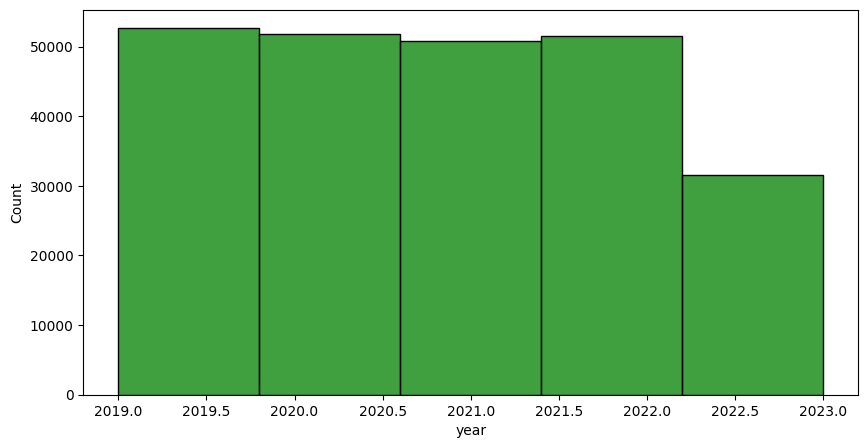

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='year',color='green', bins = 5)

In [27]:
artist=df['artist_name'].value_counts()
artist=artist[:10,]
print(artist)

Elvis Presley            627
Little Symphony          449
SICK LEGEND              442
Sleep Fruits Music       413
Armin van Buuren         292
Jim Brickman             285
Johann Sebastian Bach    275
Piano Peace              255
Giuseppe Verdi           254
Ludwig van Beethoven     253
Name: artist_name, dtype: int64


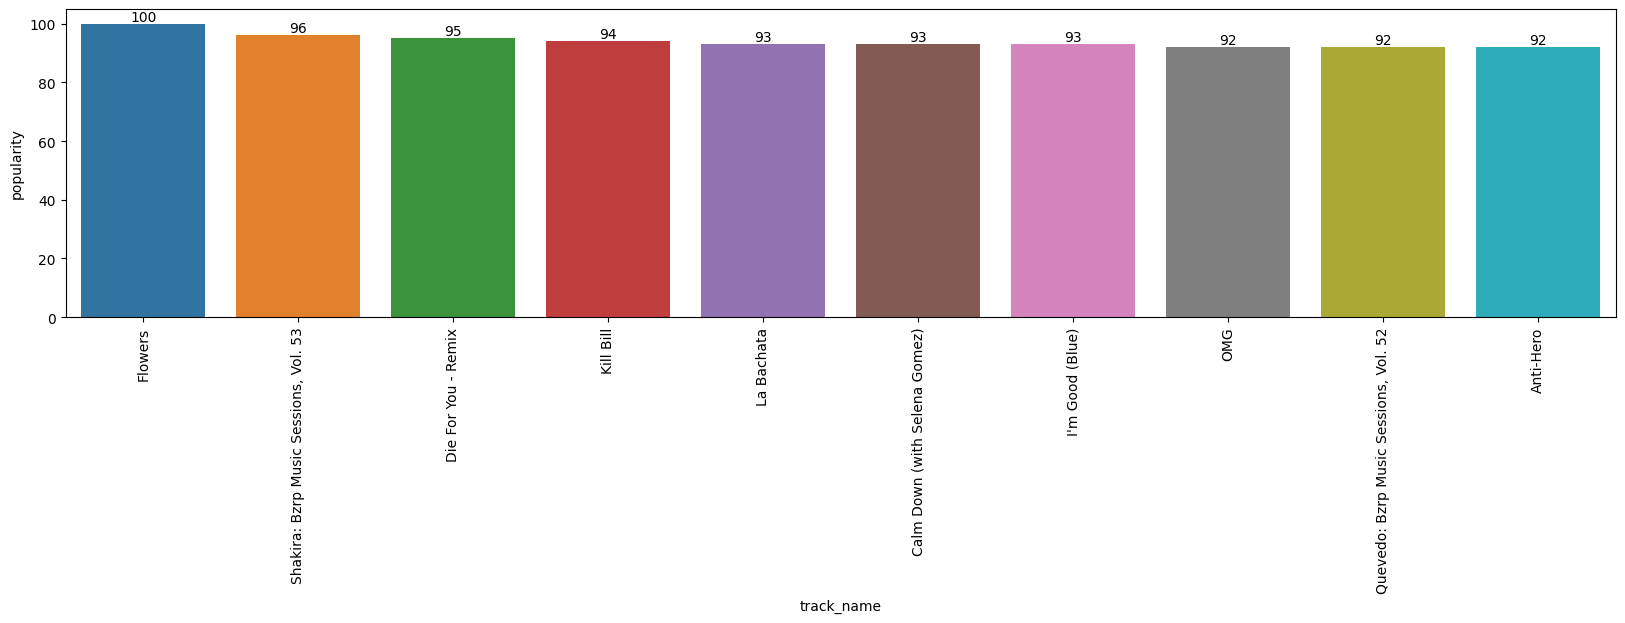

In [28]:
popularity5=df.sort_values(by='popularity',ascending=False).head(10)
plt.figure(figsize=(20,4))
ac=sns.barplot(data=popularity5,x='track_name',y='popularity')
ac.set_xticklabels(ac.get_xticklabels(), rotation=90)
for i in ac.containers:
    ac.bar_label(i,)

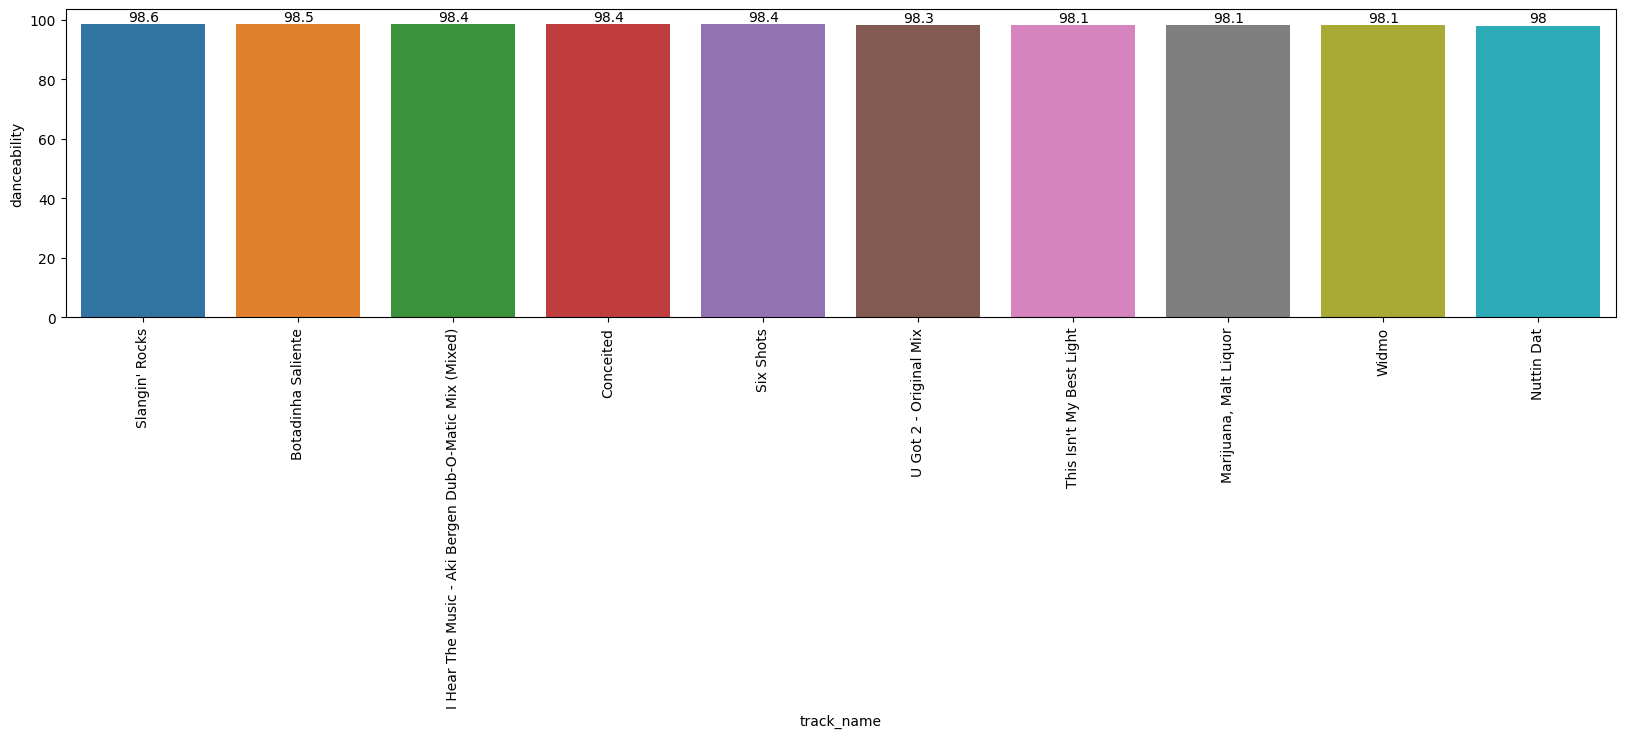

In [29]:
df['danceability']=df['danceability']*100
df.sort_values(by='danceability',ascending =False,inplace=True)
dance=df.head(10)
plt.figure(figsize=(20,4))
ab=sns.barplot(x='track_name',y='danceability',data=dance)
ab.set_xticklabels(ab.get_xticklabels(), rotation=90)
for i in ab.containers:
    ab.bar_label(i,)

Text(0, 0.5, 'avg loudness')

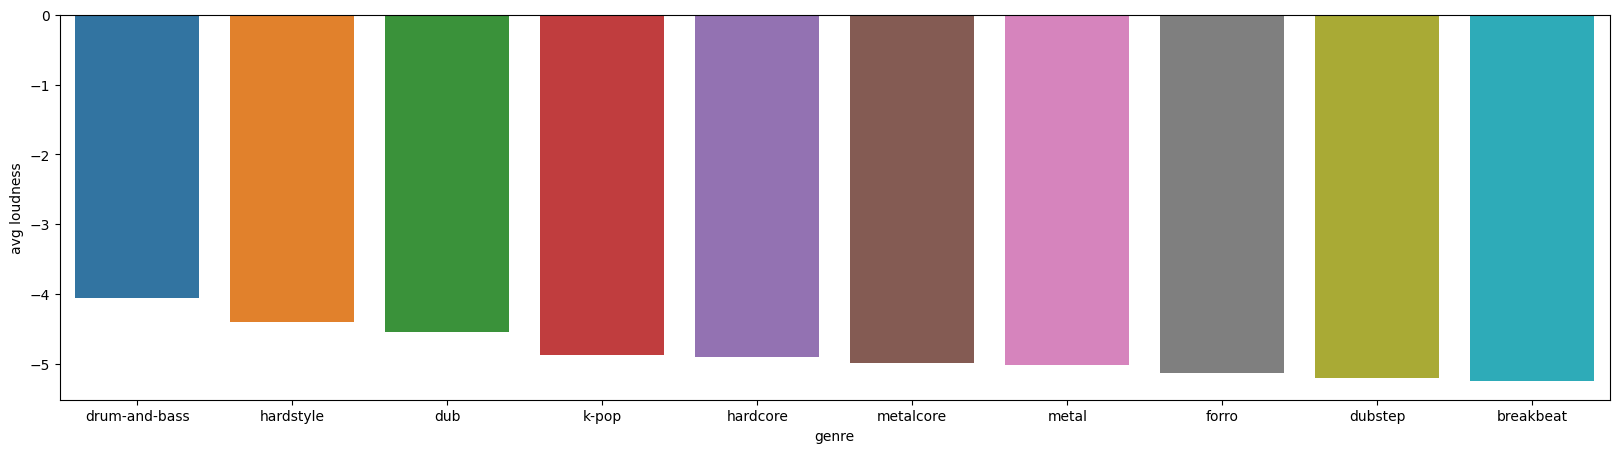

In [30]:
loudness_genreh=df.groupby('genre')['loudness'].mean().sort_values(ascending=False)
loudness_genreh=loudness_genreh[:10,]
plt.figure(figsize=(20,5))
sns.barplot(x=loudness_genreh.index,y=loudness_genreh.values)
plt.ylabel('avg loudness')

Text(0, 0.5, 'avg loudness')

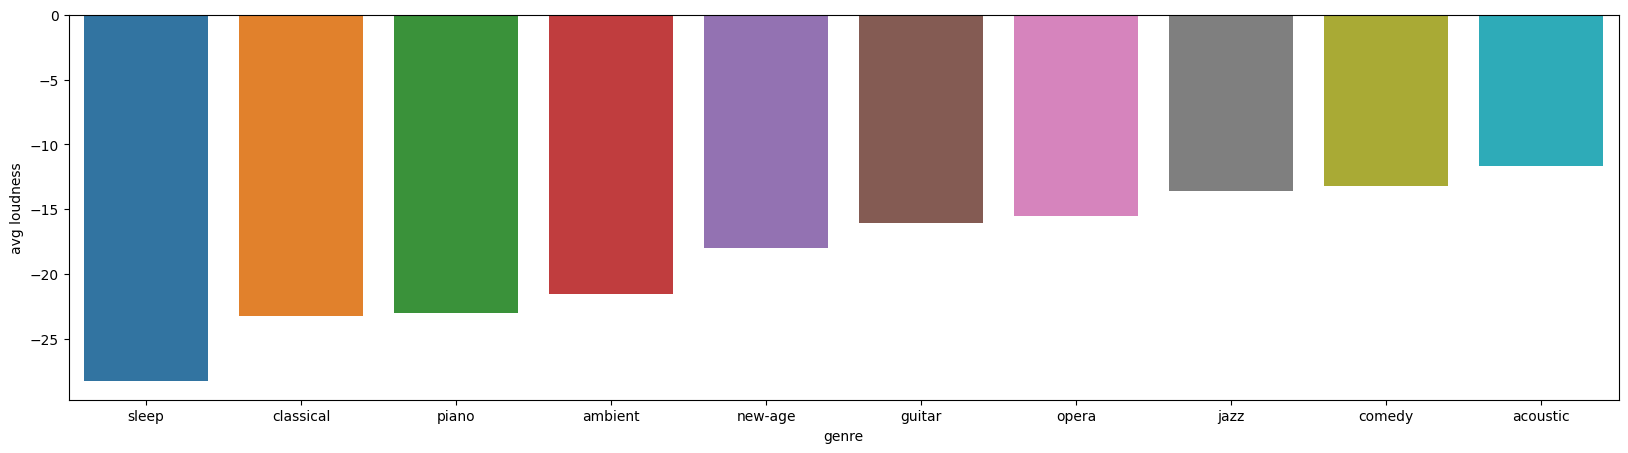

In [31]:
loudness_genrel=df.groupby('genre')['loudness'].mean().sort_values()
loudness_genrel=loudness_genrel[:10,]
plt.figure(figsize=(20,5))
sns.barplot(x=loudness_genrel.index,y=loudness_genrel.values)
plt.ylabel('avg loudness')

<Axes: xlabel='genre', ylabel='avg speechiness'>

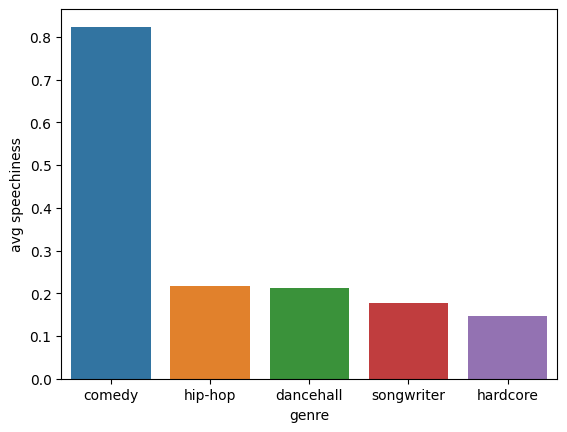

In [32]:
speech=df.groupby('genre')['speechiness'].mean().sort_values(ascending=False)
speech=speech[:5,]
plt.ylabel('avg speechiness')
sns.barplot(x=speech.index,y=speech.values)

<Axes: xlabel='genre', ylabel='avg instrumentalness'>

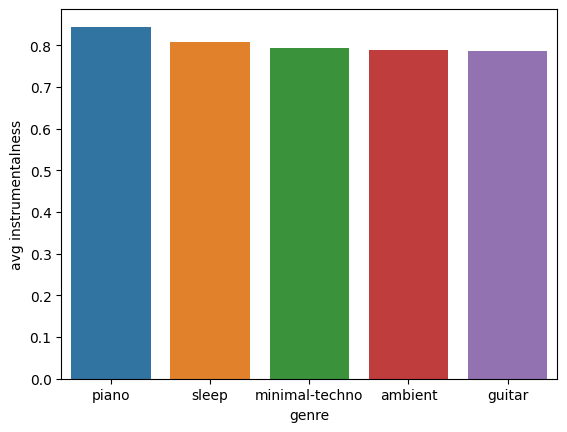

In [33]:
top_instrumentless=df.groupby('genre')['instrumentalness'].mean().sort_values(ascending=False)
top_instrumentless=top_instrumentless[:5,]
plt.ylabel('avg instrumentalness')
sns.barplot(x=top_instrumentless.index,y=top_instrumentless.values)

<Axes: xlabel='genre'>

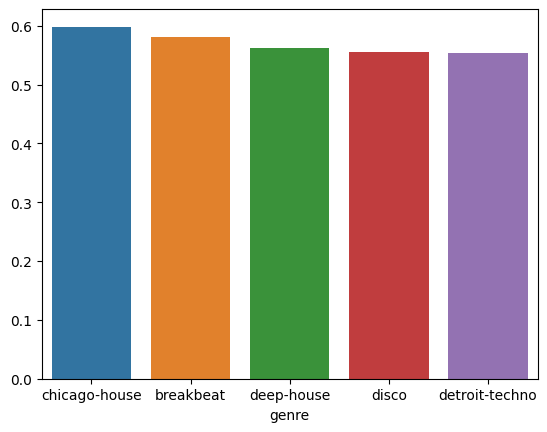

In [34]:
top_instrumentless=df.groupby('genre')['ED_Interaction'].mean().sort_values(ascending=False)
top_instrumentless=top_instrumentless[:5,]
sns.barplot(x=top_instrumentless.index,y=top_instrumentless.values)

<Axes: xlabel='bpm_group', ylabel='Count'>

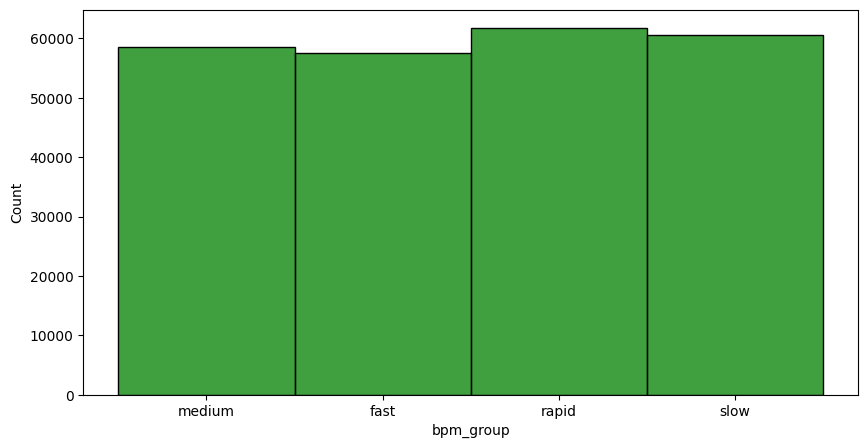

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='bpm_group',color='green', bins = 5)

Add Hypo

In [36]:
df['speechiness'].describe(include='all')

count    238493.000000
mean          0.097213
std           0.132218
min           0.000000
25%           0.038000
50%           0.051800
75%           0.092900
max           0.967000
Name: speechiness, dtype: float64

In [37]:
df.drop(df[df['speechiness'] == 0.000000].index, inplace = True)

In [39]:
print("Count of unique artist:",df['artist_name'].nunique())
print("Count of unique track_name:",df['track_name'].nunique())
print("Count of unique genre:",df['genre'].nunique())

Count of unique artist: 30273
Count of unique track_name: 196338
Count of unique genre: 82


[Text(0, 0, 'comedy'),
 Text(1, 0, 'funk'),
 Text(2, 0, 'chicago-house'),
 Text(3, 0, 'dance'),
 Text(4, 0, 'deep-house'),
 Text(5, 0, 'disco'),
 Text(6, 0, 'french'),
 Text(7, 0, 'minimal-techno'),
 Text(8, 0, 'detroit-techno'),
 Text(9, 0, 'hip-hop'),
 Text(10, 0, 'german'),
 Text(11, 0, 'party'),
 Text(12, 0, 'blues'),
 Text(13, 0, 'techno'),
 Text(14, 0, 'electro'),
 Text(15, 0, 'house'),
 Text(16, 0, 'rock'),
 Text(17, 0, 'afrobeat'),
 Text(18, 0, 'groove'),
 Text(19, 0, 'club'),
 Text(20, 0, 'sad'),
 Text(21, 0, 'spanish'),
 Text(22, 0, 'indian'),
 Text(23, 0, 'progressive-house'),
 Text(24, 0, 'swedish'),
 Text(25, 0, 'dancehall'),
 Text(26, 0, 'country'),
 Text(27, 0, 'trip-hop'),
 Text(28, 0, 'pop'),
 Text(29, 0, 'jazz'),
 Text(30, 0, 'ska'),
 Text(31, 0, 'chill'),
 Text(32, 0, 'garage'),
 Text(33, 0, 'emo'),
 Text(34, 0, 'electronic'),
 Text(35, 0, 'edm'),
 Text(36, 0, 'forro'),
 Text(37, 0, 'dub'),
 Text(38, 0, 'hardcore'),
 Text(39, 0, 'breakbeat'),
 Text(40, 0, 'goth'),
 T

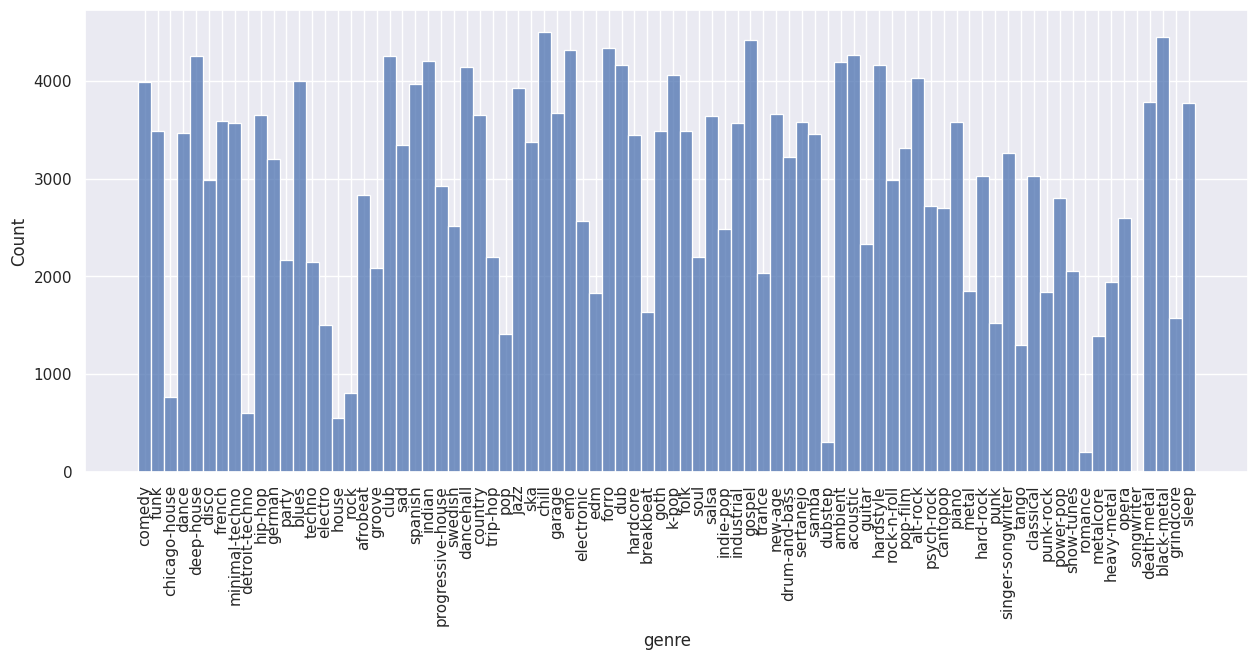

In [40]:
sns.set(rc={"figure.figsize":(15, 6)})
ax=sns.histplot(df["genre"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [41]:
df[df['genre'] == 'songwriter']

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,time_signature,ED_Interaction,bpm_group,IS_Ratio,average_acousticness,duration_mins
1075600,Jake Cornell,playing yourself,31,2022,songwriter,68.0,0.488,0,-7.521,1,...,0.000000,0.3940,0.688,148.017,4,0.331840,rapid,0.000000,0.490719,2.190367
1075599,JORDY,Dressed Up In A T-Shirt,23,2021,songwriter,65.3,0.497,9,-9.172,1,...,0.000000,0.0993,0.783,79.906,4,0.324541,slow,0.000000,0.490719,2.526983
1075601,安溥,Miss missed Love,37,2022,songwriter,58.1,0.421,7,-11.319,0,...,0.000118,0.3410,0.348,116.911,4,0.244601,medium,0.004229,0.490719,3.113000
1075597,Lady Lamb,Untitled Soul,14,2019,songwriter,48.5,0.496,7,-6.394,1,...,0.000232,0.0794,0.239,115.892,3,0.240560,medium,0.007460,0.490719,4.624667
1075598,Yusuf / Cat Stevens,Tea For The Tillerman,27,2020,songwriter,46.6,0.286,0,-8.703,1,...,0.000764,0.1910,0.599,211.315,4,0.133276,rapid,0.005832,0.490719,0.996667


In [42]:
df.drop(df[df['genre'] == 'songwriter'].index, inplace = True)

[Text(0, 0, 'comedy'),
 Text(1, 0, 'funk'),
 Text(2, 0, 'chicago-house'),
 Text(3, 0, 'dance'),
 Text(4, 0, 'deep-house'),
 Text(5, 0, 'disco'),
 Text(6, 0, 'french'),
 Text(7, 0, 'minimal-techno'),
 Text(8, 0, 'detroit-techno'),
 Text(9, 0, 'hip-hop'),
 Text(10, 0, 'german'),
 Text(11, 0, 'party'),
 Text(12, 0, 'blues'),
 Text(13, 0, 'techno'),
 Text(14, 0, 'electro'),
 Text(15, 0, 'house'),
 Text(16, 0, 'rock'),
 Text(17, 0, 'afrobeat'),
 Text(18, 0, 'groove'),
 Text(19, 0, 'club'),
 Text(20, 0, 'sad'),
 Text(21, 0, 'spanish'),
 Text(22, 0, 'indian'),
 Text(23, 0, 'progressive-house'),
 Text(24, 0, 'swedish'),
 Text(25, 0, 'dancehall'),
 Text(26, 0, 'country'),
 Text(27, 0, 'trip-hop'),
 Text(28, 0, 'pop'),
 Text(29, 0, 'jazz'),
 Text(30, 0, 'ska'),
 Text(31, 0, 'chill'),
 Text(32, 0, 'garage'),
 Text(33, 0, 'emo'),
 Text(34, 0, 'electronic'),
 Text(35, 0, 'edm'),
 Text(36, 0, 'forro'),
 Text(37, 0, 'dub'),
 Text(38, 0, 'hardcore'),
 Text(39, 0, 'breakbeat'),
 Text(40, 0, 'goth'),
 T

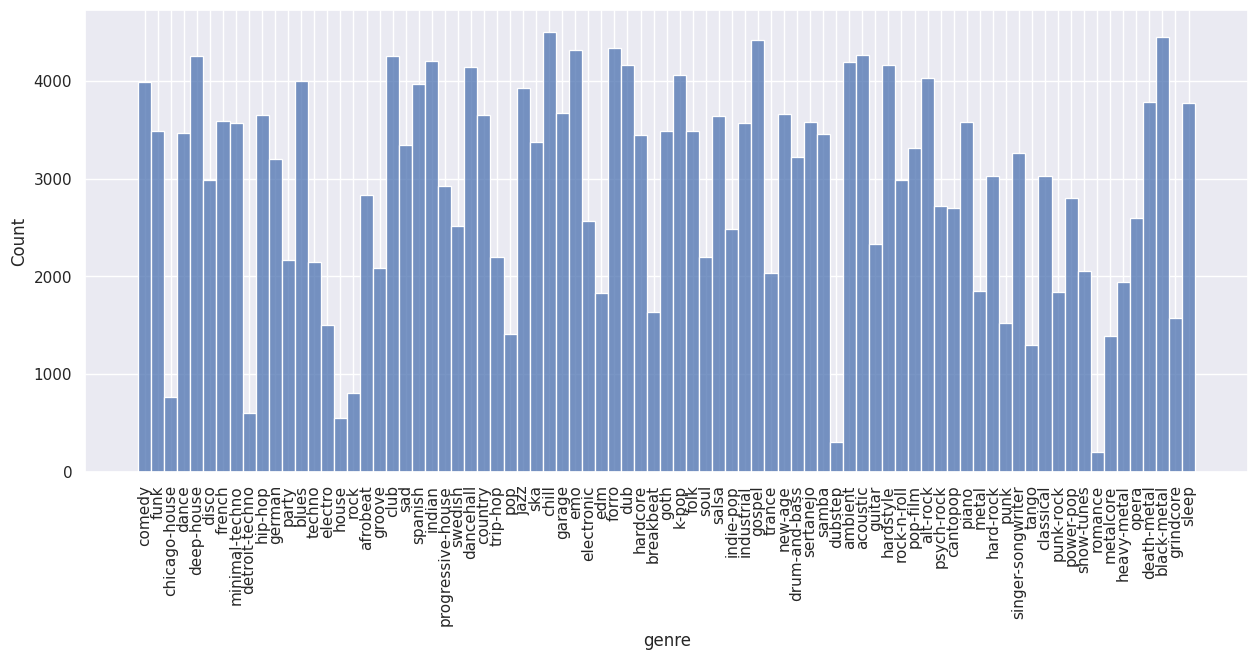

In [43]:
sns.set(rc={"figure.figsize":(15, 6)})
ax=sns.histplot(df["genre"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [44]:
top_ten_genres = df['genre'].value_counts().nlargest(10).index.tolist()
bottom_ten_genres = df['genre'].value_counts().nsmallest(10).index.tolist()

In [45]:
print(top_ten_genres)

['chill', 'black-metal', 'gospel', 'forro', 'emo', 'acoustic', 'deep-house', 'club', 'indian', 'ambient']


In [46]:
print(bottom_ten_genres)

['romance', 'dubstep', 'house', 'detroit-techno', 'chicago-house', 'rock', 'tango', 'metalcore', 'pop', 'electro']


<Axes: ylabel='Frequency'>

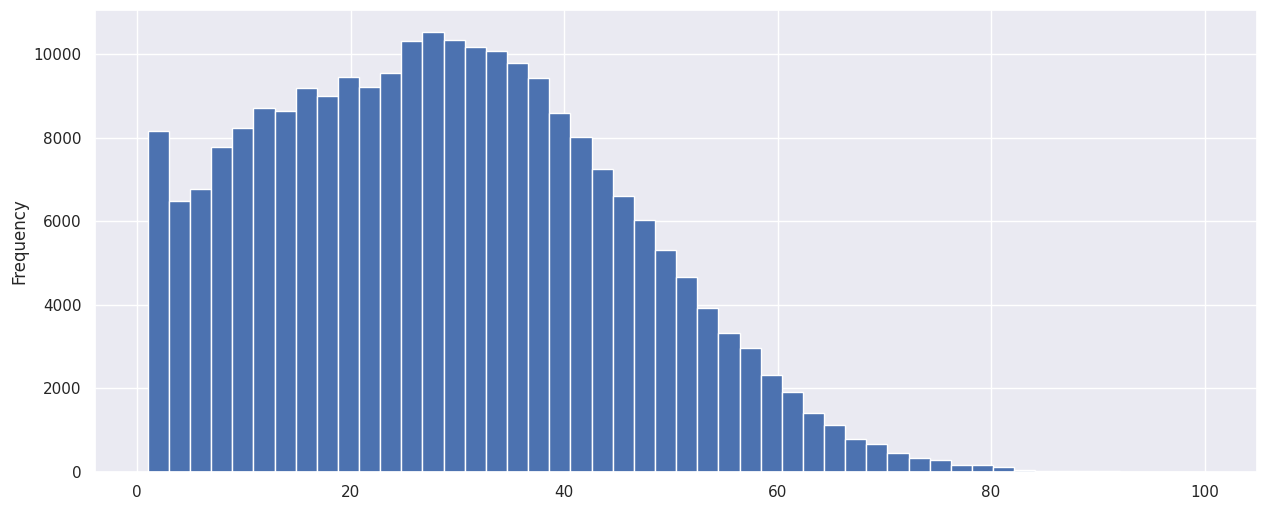

In [47]:
df['popularity'].plot(kind='hist', bins=50)

In [48]:
df.tail(10)

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,time_signature,ED_Interaction,bpm_group,IS_Ratio,average_acousticness,duration_mins
1063087,Calm Ocean Sounds,Atlantic Wash,26,2019,sleep,5.54,0.990000,1,-18.467,1,...,0.968,0.4890,0.00001,54.952,3,0.054846,slow,15.562701,0.778803,2.266667
1066376,Sleep Fruits Music,30 Min Brown Noise,23,2022,sleep,5.54,0.039700,1,-34.734,1,...,1.000,0.1120,0.01500,66.879,4,0.002199,slow,5.649718,0.778803,30.200000
65109,Ryuichi Sakamoto,20220202,36,2023,ambient,5.54,0.001960,5,-26.971,1,...,0.709,0.1010,0.03350,57.148,4,0.000109,slow,12.373473,0.728763,6.375917
63748,36,Take Me by the Hand (36 After Dark Version),23,2021,ambient,5.53,0.004580,1,-14.385,1,...,0.872,0.1100,0.02970,59.104,3,0.000253,slow,17.199211,0.728763,3.784850
83804,Warmoon Lord,Ancient Deaths Crown,17,2020,black-metal,5.50,0.666000,4,-6.975,0,...,0.910,0.2750,0.05790,55.692,4,0.036630,slow,11.787565,0.061433,5.458950
1063562,Granular,Brown Noise 68 hz,24,2019,sleep,5.45,0.046900,1,-31.820,0,...,0.353,0.1110,0.02530,63.428,4,0.002556,slow,5.576619,0.778803,2.898367
84517,A Thousand Sufferings,Stilte,20,2021,black-metal,5.43,0.707000,8,-6.261,1,...,0.228,0.0964,0.10500,58.433,4,0.038390,slow,2.593857,0.061433,9.093567
807543,Rafael Anton Irisarri,Atrial 1.1,12,2022,new-age,5.42,0.000056,4,-14.074,1,...,0.563,0.0998,0.03170,61.168,4,0.000003,slow,2.857868,0.811769,10.250567
1063999,White Noise Babies,"Vaccum Cleaner Noise, Pt. 27",44,2020,sleep,5.34,0.033900,3,-16.455,1,...,0.985,0.4450,0.02480,48.647,4,0.001810,slow,16.666667,0.778803,1.387033
1065177,Linder Valley,Polyrhythm Droplets,33,2021,sleep,4.69,0.044700,10,-50.769,0,...,0.981,0.2020,0.19900,81.353,3,0.002096,slow,16.350000,0.778803,2.452033


In [49]:
for i, row in df.iterrows():
  score = 'low'
  if row.popularity >=40:
    score = 'popular'
  df.at[i, 'popular'] = score

In [50]:
columns = df[['year', 'danceability', 'energy', 'key', 'loudness', 'mode',
              'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature',
              'ED_Interaction', 'bpm_group', 'IS_Ratio', 'average_acousticness']]

In [51]:
X = columns.select_dtypes(include='number')
y = df['popular']

In [52]:
X.head()

,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,ED_Interaction,IS_Ratio,average_acousticness
211001,2020,98.6,0.351,6,-10.660,1,0.2260,0.00378,0.000000,0.0898,0.357,114.984,3.780433,4,0.346086,0.000000,0.735816
484260,2022,98.5,0.698,0,-2.531,1,0.0341,0.14200,0.000000,0.3210,0.914,119.959,2.633333,4,0.687530,0.000000,0.222015
148211,2020,98.4,0.551,8,-9.187,0,0.2850,0.00113,0.006640,0.3050,0.272,123.979,4.948167,4,0.542184,0.023298,0.032253
247092,2022,98.4,0.719,8,-5.119,1,0.0893,0.05660,0.000099,0.5170,0.437,118.015,2.447583,4,0.707496,0.001106,0.131716
302279,2022,98.4,0.887,11,-4.309,0,0.1970,0.01340,0.003360,0.7770,0.896,126.011,3.174600,4,0.872808,0.017056,0.055158


In [53]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'ED_Interaction', 'bpm_group', 'IS_Ratio',
       'average_acousticness', 'duration_mins', 'popular'],
      dtype='object')

find the split with DT

In [54]:
all_columns = df[['artist_name', 'track_name', 'popularity', 'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
              'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature',
              'ED_Interaction', 'bpm_group', 'IS_Ratio', 'average_acousticness']]

popularity              1.000000
danceability            0.187209
ED_Interaction          0.085410
loudness                0.077818
time_signature          0.031902
valence                 0.025170
year                    0.020342
tempo                   0.005511
key                     0.004606
mode                   -0.031420
acousticness           -0.036386
energy                 -0.039885
average_acousticness   -0.058452
speechiness            -0.071783
liveness               -0.115251
IS_Ratio               -0.123425
duration_mins          -0.155682
instrumentalness       -0.156456
Name: popularity, dtype: float64

In [56]:
results = ols("popularity ~ ED_Interaction + IS_Ratio + year + danceability + energy + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_mins", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2121.
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:56:51   Log-Likelihood:            -9.9065e+05
No. Observations:              238299   AIC:                         1.981e+06
Df Residuals:                  238284   BIC:                         1.981e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -493.5012     47.553  

In [57]:
cat_columns = ['genre', 'mode', 'year']
num_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
               'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature']
target = 'popularity'

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [59]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

Linear Reg

In [60]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [61]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'mode', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_mins',
                                                   'time_signature'])])),
                ('regressor', LinearRegression())])

In [62]:
pred = linear_regression.predict(X_test)

In [63]:
RMSE = np.sqrt(mean_squared_error(pred, y_test))
print('RMSE:' ,RMSE)

r2 = r2_score(y_test, pred)
print("R-squared value:", r2)

RMSE: 10.273839359978703
R-squared value: 0.6060875982368839


Ridge Reg

In [64]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [65]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'mode', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_mins',
                                                   'time_signature'])])),
                ('regressor', Ridge(alpha=3.0))])

In [66]:
pred_ridge = ridge_regression.predict(X_test)

In [67]:
RMSE = np.sqrt(mean_squared_error(pred_ridge, y_test))
print('RMSE:' ,RMSE)

r2 = r2_score(y_test, pred_ridge)
print("R-squared value:", r2)

RMSE: 10.273934276034916
R-squared value: 0.6060803197924645


Lasso Ridge

In [68]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [69]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'mode', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_mins',
                                                   'time_signature'])])),
                ('regressor', Lasso())])

In [70]:
lasso_pred = lasso_regression.predict(X_test)

In [71]:
RMSE = np.sqrt(mean_squared_error(lasso_pred, y_test))
print('RMSE:', RMSE)

r2 = r2_score(y_test, lasso_pred)
print("R-squared value:", r2)

RMSE: 15.80791707439805
R-squared value: 0.0674257698378391


Elastic Net

In [72]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [73]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['genre', 'mode', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_mins',
                                                   'time_signature'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [74]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [75]:
RMSE = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
print('RMSE', RMSE)

r2 = r2_score(y_test, elasticnet_pred)
print("R-squared value:", r2)

RMSE 15.795137453555292
R-squared value: 0.06893300543263614


Logestic Reg

In [76]:
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=42, test_size=0.3, shuffle=True)

In [77]:
from sklearn import datasets, linear_model, metrics

log_reg = linear_model.LogisticRegression(solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [78]:
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Logistic Regression Model Accuracy (in %): 74.54609036228842


K Nearest Neigh

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [80]:
print("KNN Model Accuracy (in %):",
metrics.accuracy_score(y_test, pred) * 100)

KNN Model Accuracy (in %): 69.9972024059309


Decision Tree

In [81]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=2)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

In [82]:
print("Decsision Tree Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Decsision Tree Model Accuracy (in %): 73.76556161700937


Random Forest

In [83]:
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

In [84]:
print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Random Forest Model Accuracy (in %): 83.46062386347741


### Playlist Generator

In [85]:
df_clustering.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,ED_Interaction,bpm_group,IS_Ratio,average_acousticness
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,0.000000,0.1150,0.139,133.406,240166,3,0.146349,fast,0.000000,0.574223
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,...,0.000014,0.0974,0.515,140.182,216387,4,0.259688,rapid,0.000531,0.574223
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,...,0.000050,0.0895,0.145,139.832,158960,4,0.095706,fast,0.001548,0.574223
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,...,0.000000,0.0797,0.508,204.961,304293,4,0.098392,rapid,0.000000,0.574223
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,...,0.019300,0.1100,0.217,171.864,244320,4,0.340130,rapid,0.639073,0.574223


**We will exclude the songs from before the year 2012**

In [86]:
df_clustering.drop(df_clustering[df_clustering['year'] < 2012].index, inplace = True)

In [87]:
df_clustering.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'ED_Interaction', 'bpm_group',
       'IS_Ratio', 'average_acousticness'],
      dtype='object')

In [88]:
columns_to_drop = ['key','mode','liveness','time_signature','energy','danceability','tempo']
df_clustering.drop(columns=columns_to_drop, inplace=True)

In [89]:
df_clustering.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'valence', 'duration_ms', 'ED_Interaction', 'bpm_group', 'IS_Ratio',
       'average_acousticness'],
      dtype='object')

In [90]:
bpm_onehot = pd.get_dummies(df_clustering['bpm_group'], prefix='bpm',dtype=int)
df_clustering = pd.concat([df_clustering, bpm_onehot], axis=1)
df_clustering.drop(columns=['bpm_group'], inplace=True)

In [91]:
df_clustering.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'valence', 'duration_ms', 'ED_Interaction', 'IS_Ratio',
       'average_acousticness', 'bpm_fast', 'bpm_medium', 'bpm_rapid',
       'bpm_slow'],
      dtype='object')

In [92]:
df_clustering.head()

,artist_name,track_name,track_id,popularity,year,genre,loudness,speechiness,acousticness,instrumentalness,valence,duration_ms,ED_Interaction,IS_Ratio,average_acousticness,bpm_fast,bpm_medium,bpm_rapid,bpm_slow
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,-10.058,0.0429,0.6940,0.000000,0.139,240166,0.146349,0.000000,0.574223,1,0,0,0
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,-10.286,0.0258,0.4770,0.000014,0.515,216387,0.259688,0.000531,0.574223,0,0,1,0
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,-13.711,0.0323,0.3380,0.000050,0.145,158960,0.095706,0.001548,0.574223,1,0,0,0
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,-9.845,0.0363,0.8070,0.000000,0.508,304293,0.098392,0.000000,0.574223,0,0,1,0
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,-5.419,0.0302,0.0726,0.019300,0.217,244320,0.340130,0.639073,0.574223,0,0,1,0


In [93]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622651 entries, 0 to 1155058
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   artist_name           622651 non-null  object 
 1   track_name            622651 non-null  object 
 2   track_id              622651 non-null  object 
 3   popularity            622651 non-null  int64  
 4   year                  622651 non-null  int64  
 5   genre                 622651 non-null  object 
 6   loudness              622651 non-null  float64
 7   speechiness           622651 non-null  float64
 8   acousticness          622651 non-null  float64
 9   instrumentalness      622651 non-null  float64
 10  valence               622651 non-null  float64
 11  duration_ms           622651 non-null  int64  
 12  ED_Interaction        622651 non-null  float64
 13  IS_Ratio              622590 non-null  float64
 14  average_acousticness  622651 non-null  float64
 15 

**We will apply data scaling prior to creating clusters.**

In [94]:
columns_for_scaling = ['loudness', 'speechiness', 'acousticness', 'instrumentalness',
                       'valence', 'duration_ms', 'ED_Interaction',
                       'average_acousticness', 'bpm_fast', 'bpm_medium', 'bpm_rapid',
                       'bpm_slow']
scaler = StandardScaler()
data = scaler.fit_transform(df_clustering[columns_for_scaling])
scaled_df = pd.DataFrame(data=data, columns=columns_for_scaling)

In [95]:
scaled_df.head()

,loudness,speechiness,acousticness,instrumentalness,valence,duration_ms,ED_Interaction,average_acousticness,bpm_fast,bpm_medium,bpm_rapid,bpm_slow
0,-0.220533,-0.401187,1.075595,-0.693296,-1.112053,0.012212,-1.134051,1.010543,1.745347,-0.580835,-0.577672,-0.577942
1,-0.259948,-0.531378,0.460353,-0.693258,0.315275,-0.168216,-0.522715,1.010543,-0.572952,-0.580835,1.731085,-0.577942
2,-0.852032,-0.481890,0.066258,-0.693160,-1.089277,-0.603954,-1.407213,1.010543,1.745347,-0.580835,-0.577672,-0.577942
3,-0.183712,-0.451436,1.395975,-0.693296,0.288702,0.498787,-1.392725,1.010543,-0.572952,-0.580835,1.731085,-0.577942
4,0.581417,-0.497879,-0.686209,-0.640715,-0.815958,0.043731,-0.088821,1.010543,-0.572952,-0.580835,1.731085,-0.577942


In [96]:
scaled_df.columns

Index(['loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'valence', 'duration_ms', 'ED_Interaction', 'average_acousticness',
       'bpm_fast', 'bpm_medium', 'bpm_rapid', 'bpm_slow'],
      dtype='object')

In [97]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [98]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    print("Epoch : ", i)
    print('-----------')


Epoch :  1
-----------
Epoch :  2
-----------
Epoch :  3
-----------
Epoch :  4
-----------
Epoch :  5
-----------
Epoch :  6
-----------
Epoch :  7
-----------
Epoch :  8
-----------
Epoch :  9
-----------
Epoch :  10
-----------
Epoch :  11
-----------
Epoch :  12
-----------
Epoch :  13
-----------
Epoch :  14
-----------
Epoch :  15
-----------
Epoch :  16
-----------
Epoch :  17
-----------
Epoch :  18
-----------
Epoch :  19
-----------


Text(0, 0.5, 'WCSS')

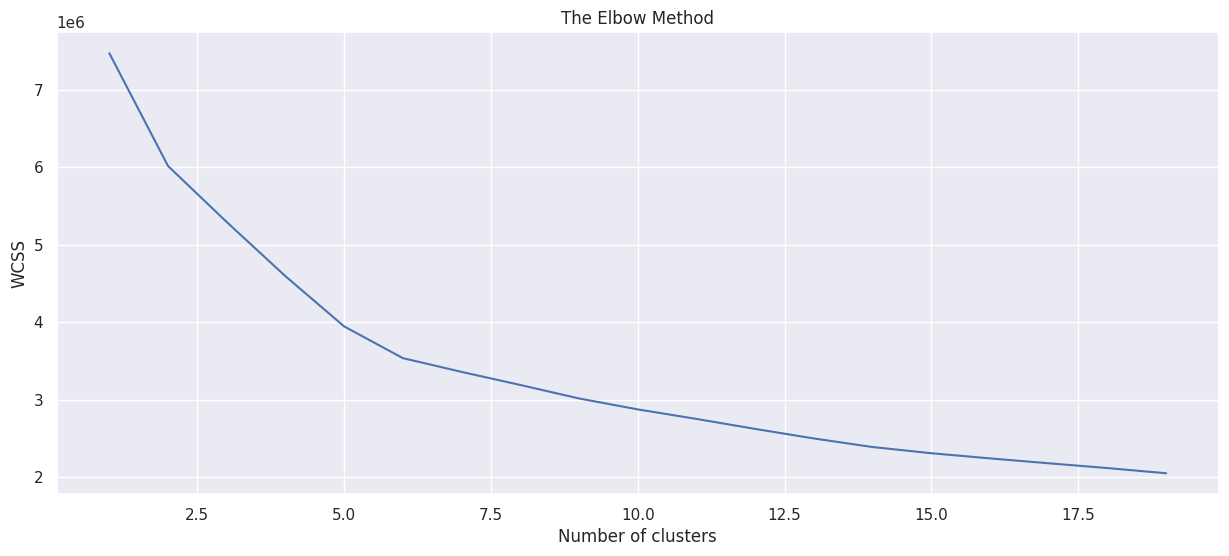

In [99]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**Based on the above graph, we have concluded that the elbow is forming at the point corresponding to 12.**

In [100]:
n_clusters = 12
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

In [101]:
df_clustering['Cluster'] = cluster_labels


In [102]:
df_clustering.head()

,artist_name,track_name,track_id,popularity,year,genre,loudness,speechiness,acousticness,instrumentalness,valence,duration_ms,ED_Interaction,IS_Ratio,average_acousticness,bpm_fast,bpm_medium,bpm_rapid,bpm_slow,Cluster
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,-10.058,0.0429,0.6940,0.000000,0.139,240166,0.146349,0.000000,0.574223,1,0,0,0,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,-10.286,0.0258,0.4770,0.000014,0.515,216387,0.259688,0.000531,0.574223,0,0,1,0,11
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,-13.711,0.0323,0.3380,0.000050,0.145,158960,0.095706,0.001548,0.574223,1,0,0,0,3
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,-9.845,0.0363,0.8070,0.000000,0.508,304293,0.098392,0.000000,0.574223,0,0,1,0,11
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,-5.419,0.0302,0.0726,0.019300,0.217,244320,0.340130,0.639073,0.574223,0,0,1,0,11


In [103]:
cluster_sizes = df_clustering['Cluster'].value_counts()

sorted_cluster_sizes = dict(sorted(cluster_sizes.items()))
for cluster_label, size in sorted_cluster_sizes.items():
    print(f"Cluster {cluster_label}: {size} data points")


Cluster 0: 113775 data points
Cluster 1: 40476 data points
Cluster 2: 78505 data points
Cluster 3: 28892 data points
Cluster 4: 76236 data points
Cluster 5: 44133 data points
Cluster 6: 42524 data points
Cluster 7: 10892 data points
Cluster 8: 81458 data points
Cluster 9: 610 data points
Cluster 10: 37615 data points
Cluster 11: 67535 data points


**We can see the cluster size of each cluster.**

Making Playlist

In [127]:
def get_similar_popular_tracks(track_name, df_clustering):
    input_track_cluster = df_clustering.loc[df_clustering["track_name"] == track_name, "Cluster"].values[0]
    input_track_popularity = df_clustering.loc[df_clustering["track_name"] == track_name, "popularity"].values[0]

    recommended_tracks = df_clustering[
        (df_clustering["Cluster"] == input_track_cluster) &
        (df_clustering["popularity"] > input_track_popularity)
    ]

    recommended_tracks = recommended_tracks.sort_values(by="popularity", ascending=False)

    recommended_track_names = recommended_tracks["track_name"].head(10).tolist()

    return recommended_track_names



**By executing the following code and inputting a track name from the data, we can generate a playlist containing ten songs from the same cluster as the input track, with each song having a popularity greater than that of the input track.**

In [128]:
input_track_name = input("Enter the track name: ")

recommended_tracks = get_similar_popular_tracks(input_track_name, df_clustering)

print("Recommended Tracks:")
for idx, track_name in enumerate(recommended_tracks, 1):
    print(f"{idx}. {track_name}")


Enter the track name: Flight Of The Stars
Recommended Tracks:
1. golden hour
2. When I Was Your Man
3. Happier Than Ever
4. Sem Aliança no Dedo
5. Memories
6. Lover
7. SLOW DANCING IN THE DARK
8. All Of The Girls You Loved Before
9. Stay With Me
10. Too Good At Goodbyes
